<a href="https://colab.research.google.com/github/kelseyneis/narrative_transportation/blob/yu_branch/8980_narrative_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/course_projects/8980-narrative")
!ls

'Copy of Transporting narrative - fanfiction.gsheet'   raw_data
 data						       Sentiment
 file1_pos.csv					       taggings.gdoc
 POS_tag


## POS taggings

### tests

In [ ]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
text = word_tokenize("All the world lay in a sleep under the blazing stars.")
pos_tag = nltk.pos_tag(text)

In [ ]:
text

['All',
 'the',
 'world',
 'lay',
 'in',
 'a',
 'sleep',
 'under',
 'the',
 'blazing',
 'stars',
 '.']

In [ ]:
pos_tag

[('All', 'PDT'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('lay', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('sleep', 'NN'),
 ('under', 'IN'),
 ('the', 'DT'),
 ('blazing', 'NN'),
 ('stars', 'NNS'),
 ('.', '.')]

In [ ]:
## POS-tagging for story - draft

import numpy as np
import pandas as pd
from collections import Counter

# DATA_PATH = "/content/gdrive/MyDrive/course_projects/8980-narrative/data/"
DATA_PATH = "/content/gdrive/MyDrive/course_projects/8980-narrative/data/file1.csv"

df = pd.read_csv(DATA_PATH)
title = list(df.columns)[0]  # story title / col name

# process each story line
taggings = []
tag_dist = []

for index, row in df.iterrows():
    # print(row[title])
    # text = word_tokenize(row[title])
    text = tokenizer.tokenize(row[title])
    pos_tag = nltk.pos_tag(text)
    print(pos_tag)

    taggings.append(pos_tag)

    # handle the tag distributions
    tags = []
    for item in pos_tag:
      tags.append(item[1])

    keys = list(Counter(tags).keys())
    counts = list(Counter(tags).values())
    tag_dist.append(list(zip(keys, counts)))

df["taggings"] = taggings
df["tag_distributions"] = tag_dist

DATA_OUTPUT_PATH = "/content/gdrive/MyDrive/course_projects/8980-narrative/file1_pos.csv"
df.to_csv(DATA_OUTPUT_PATH)


[('All', 'PDT'), ('the', 'DT'), ('world', 'NN'), ('lay', 'NN'), ('in', 'IN'), ('a', 'DT'), ('sleep', 'NN'), ('under', 'IN'), ('the', 'DT'), ('blazing', 'NN'), ('stars', 'NNS')]
[('Princess', 'NNP'), ('Mee', 'NNP'), ('so', 'RB'), ('far', 'RB'), ('as', 'IN'), ('she', 'PRP'), ('could', 'MD'), ('tell', 'VB'), ('was', 'VBD'), ('the', 'DT'), ('only', 'JJ'), ('thing', 'NN'), ('stirring', 'NN'), ('in', 'IN'), ('all', 'PDT'), ('the', 'DT'), ('vast', 'JJ'), ('woodland', 'NN'), ('save', 'VBP'), ('only', 'RB'), ('the', 'DT'), ('wind', 'NN')]
[('Snow', 'NNP'), ('lay', 'NN'), ('on', 'IN'), ('the', 'DT'), ('ground', 'NN'), ('all', 'DT'), ('about', 'IN'), ('for', 'IN'), ('it', 'PRP'), ('had', 'VBD'), ('been', 'VBN'), ('falling', 'VBG'), ('while', 'IN'), ('they', 'PRP'), ('marched', 'VBD'), ('and', 'CC'), ('the', 'DT'), ('night', 'NN'), ('was', 'VBD'), ('cold', 'JJ')]
[('She', 'PRP'), ('gathered', 'VBD'), ('her', 'PRP'), ('warm', 'JJ'), ('cloak', 'NN'), ('woven', 'VBN'), ('from', 'IN'), ('the', 'DT'), 

In [ ]:
# Total story distributions

import numpy as np
import pandas as pd
from collections import Counter
import ast

file_path = "/content/gdrive/MyDrive/course_projects/8980-narrative/POS_tag/file1_tagging.csv"
df = pd.read_csv(file_path)

total_taggings = []
for line in df["taggings"]:
  line_lst = ast.literal_eval(line)
  total_taggings += line_lst

# get taggings
only_taggings = []
for item in total_taggings:
  only_taggings.append(item[1])
# print(only_taggings)

# getting distributions
tag_distribution = []
keys = list(Counter(only_taggings).keys())
counts = list(Counter(only_taggings).values())
tag_distribution.append(list(zip(keys, counts)))

print(tag_distribution[0])

[('PDT', 2), ('DT', 24), ('NN', 33), ('IN', 28), ('NNS', 9), ('NNP', 13), ('RB', 9), ('PRP', 13), ('MD', 4), ('VB', 4), ('VBD', 17), ('JJ', 14), ('VBP', 2), ('VBN', 7), ('VBG', 3), ('CC', 7), ('WRB', 1), ('PRP$', 9), ('TO', 1), ('WDT', 1), ('CD', 1), ('RP', 1)]


In [ ]:
# for i in range(len(keys)):
#   temp_keys = []
#   temp_counts = []
#   cur_key = keys[i]
#   if cur_key in tags_replace:
#     add_count = counts[i]
#     counts[i] = 0
#     try:
#       target_index = keys.index(tags_replace.get(cur_key))
#     except:
#       temp_keys.add

#     # add to target
#     counts[target_index] += add_count
# print(counts)

### Implementation:

In [ ]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize, RegexpTokenizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

tokenizer = RegexpTokenizer(r'\w+')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# pre-define the replacement taggers

tags_replace = {'JJR': 'JJ', 'JJS': 'JJ', 
          'NNS': 'NN', 'NNPS': 'NN',
          'RBR': 'RB', 'RBS': 'RB',
          'VBD': 'VB', 'VBG': 'VB', 'VBN': 'VB', 'VBP': 'VB', 'VBZ': 'VB',
          'WDT': 'WP', 'WP$': 'WP', 'WRB': 'WP'}

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def process_single_file(in_path, out_path):
  DATA_PATH = in_path

  df = pd.read_csv(DATA_PATH)
  title = list(df.columns)[0]  # story title / col name

  # process each story line
  taggings = []
  tag_dist = []

  for index, row in df.iterrows():
      # print(row[title])
      text = tokenizer.tokenize(row[title])
      pos_tag = nltk.pos_tag(text)
      # taggings.append(pos_tag)

      # handle the tag distributions per line
      tags = []
      for item in pos_tag:
        cur_tag = item[1]
        if cur_tag in tags_replace:
          tags.append(tags_replace.get(cur_tag))
        else:
          tags.append(cur_tag)
      taggings.append(tags)

      keys = list(Counter(tags).keys())
      counts = list(Counter(tags).values())
      tag_dist.append(list(zip(keys, counts)))

  df["taggings"] = taggings
  df["tag_distributions"] = tag_dist
  df.to_csv(out_path)

  # count the distributions across text
  only_taggings = [y for x in taggings for y in x]
  # print(only_taggings)

  # text_tag_distribution = []
  total_keys = list(Counter(only_taggings).keys())
  total_counts = list(Counter(only_taggings).values())
  # text_tag_distribution.append(list(zip(total_keys, total_counts)))
  # print(text_tag_distribution)

  # Seaborn pie chart
  colors = sns.color_palette('pastel')[0:5]
  plt.figure(figsize=(8, 10))
  plt.pie(total_counts, labels = total_keys, colors = colors, autopct = '%0.0f%%')
  plt.title(title)
  # plt.show()
  plt_path = out_path.replace("_tagging.csv", ".png")
  plt.savefig(plt_path)

PROCESSING: hero_high
done processhero_high
PROCESSING: hp_low
done processhp_low
PROCESSING: hero_low
done processhero_low
PROCESSING: hp_high
done processhp_high


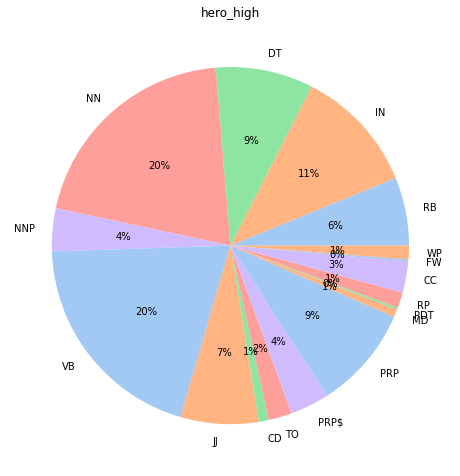

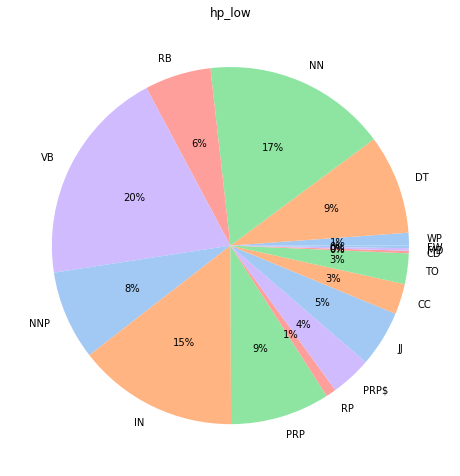

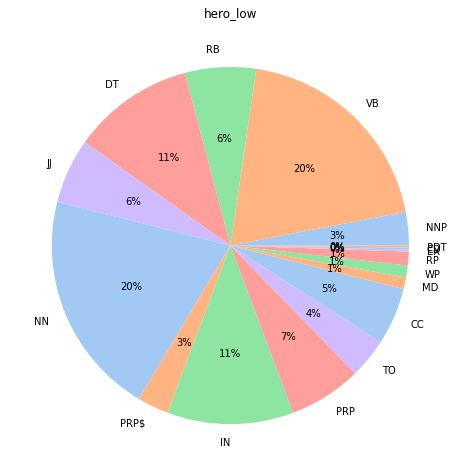

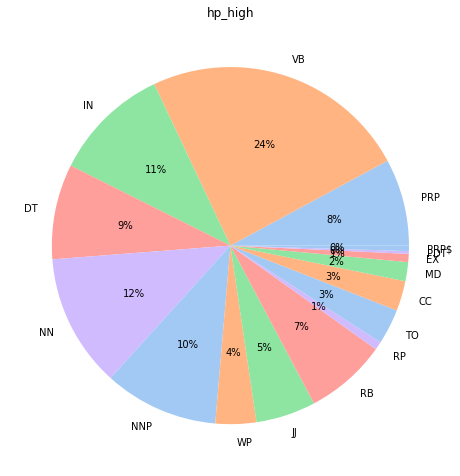

In [ ]:
import os
from collections import Counter
import ast


DATA_DIR_PATH = "/content/gdrive/MyDrive/course_projects/8980-narrative/data_csv/"
OUT_DIR_PATH = "/content/gdrive/MyDrive/course_projects/8980-narrative/POS_tag_updated/"


for root, dir, files in os.walk(DATA_DIR_PATH, topdown=False):
  for name in files:
    in_path = os.path.join(root, name)
    file_name = name.split(".")[0]
    # print(in_path)
    out_path = OUT_DIR_PATH + file_name + "_tagging.csv"
    # print(out_path)

    print("PROCESSING: " + file_name)
    process_single_file(in_path, out_path)
    
    print("done process" + file_name)

#### sentence-level one-hot classification




In [29]:
tags_replace = {'JJR': 'JJ', 'JJS': 'JJ', 
          'NNS': 'NN', 'NNPS': 'NN',
          'RBR': 'RB', 'RBS': 'RB',
          'VBD': 'VB', 'VBG': 'VB', 'VBN': 'VB', 'VBP': 'VB', 'VBZ': 'VB',
          'WDT': 'WP', 'WP$': 'WP', 'WRB': 'WP'}

tagset = ['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'LS', 'MD', 'NN', 'NNP', 
          'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RP', 'TO', 'UH', 'VB', 'WP']

In [153]:
'''
  setence-wise result
'''

## POS-tagging for single story - by sentence
import numpy as np
import pandas as pd
from collections import Counter

DATA_PATH = "/content/gdrive/MyDrive/course_projects/8980-narrative/data_csv/hero_low.csv"

df = pd.read_csv(DATA_PATH)
title = list(df.columns)[0]  # story title / col name

# process each story line
taggings = []
tag_dist = []
tagging_dist = []   # dictionary

for index, row in df.iterrows():
    # print(row[title])
    # text = word_tokenize(row[title])
    text = tokenizer.tokenize(row[title])
    pos_tag = nltk.pos_tag(text)
    print(pos_tag)

    taggings.append(pos_tag)

    # # handle the tag distributions
    # tags = []
    # for item in pos_tag:
    #   tags.append(item[1])
    tags = []
    for item in pos_tag:
      cur_tag = item[1]
      if cur_tag in tags_replace:
        tags.append(tags_replace.get(cur_tag))
      else:
        tags.append(cur_tag)

    keys = list(Counter(tags).keys())
    counts = list(Counter(tags).values())
    tag_dist.append(list(zip(keys, counts)))
    tagging_dist.append(dict(zip(keys, counts)))

df["taggings"] = taggings
df["tag_distributions"] = tag_dist

# DATA_OUTPUT_PATH = "/content/gdrive/MyDrive/course_projects/8980-narrative/file1_pos.csv"
# df.to_csv(DATA_OUTPUT_PATH)


[('Kumiko', 'NNP'), ('Toga', 'NNP'), ('was', 'VBD'), ('not', 'RB'), ('having', 'VBG'), ('a', 'DT'), ('good', 'JJ'), ('day', 'NN')]
[('First', 'NNP'), ('her', 'PRP$'), ('older', 'JJR'), ('sister', 'NN'), ('was', 'VBD'), ('kicked', 'VBN'), ('out', 'IN'), ('of', 'IN'), ('their', 'PRP$'), ('own', 'JJ'), ('house', 'NN'), ('unjustly', 'RB'), ('by', 'IN'), ('her', 'PRP$'), ('parents', 'NNS'), ('so', 'IN'), ('she', 'PRP'), ('ran', 'VBD'), ('away', 'RB'), ('from', 'IN'), ('home', 'NN'), ('to', 'TO'), ('accompany', 'VB'), ('her', 'PRP$'), ('and', 'CC'), ('make', 'VB'), ('sure', 'JJ'), ('Himiko', 'NNP'), ('didn', 'NN'), ('t', 'NN'), ('die', 'NN')]
[('She', 'PRP'), ('knew', 'VBD'), ('that', 'IN'), ('if', 'IN'), ('she', 'PRP'), ('returned', 'VBD'), ('her', 'PRP'), ('parents', 'NNS'), ('would', 'MD'), ('punish', 'VB'), ('her', 'PRP$'), ('for', 'IN'), ('running', 'VBG'), ('away', 'RB'), ('and', 'CC'), ('that', 'DT'), ('was', 'VBD'), ('not', 'RB'), ('exactly', 'RB'), ('the', 'DT'), ('most', 'RBS'), ('

In [116]:
# sentence_df - hero high
sent_df_hero_high = None
sent_df_hero_high = pd.DataFrame(columns = tagset)

for item in tagging_dist:
  # (parse) & append per line / sentence
  sent_df_hero_high = sent_df_hero_high.append(item, ignore_index = True)
sent_df_hero_high = sent_df_hero_high.fillna(0)

# add label column
sent_df_hero_high['label'] = -1

In [117]:
sent_df_hero_high.head(5)

,CC,CD,DT,EX,FW,IN,JJ,LS,MD,NN,...,POS,PRP,PRP$,RB,RP,TO,UH,VB,WP,label
0,0.0,1.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,5.0,...,0.0,0.0,1.0,3.0,0.0,1.0,0.0,2.0,0.0,-1
1,0.0,0.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,4.0,...,0.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0,-1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,-1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


#### read the responce label

In [16]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from booknlp.booknlp import BookNLP
from IPython.core.pylabtools import figsize
sns.set_theme(style="darkgrid")
figsize(10, 6)
pd.set_option('display.max_colwidth', -1)

def get_indexes(raw):
   if( not pd.isna(raw)):
      highlights = re.findall(r'\d+:', raw)
      return list(map(lambda x: int(x.replace(':', '')) - 1, highlights))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # Remove the CWD from sys.path while we load stuff.


In [17]:
responce_path = '/content/gdrive/MyDrive/course_projects/8980-narrative/survey_responses.csv'

data = pd.read_csv(responce_path)
data = data.drop(['StartDate', 'ResponseId', 'EndDate', 'IPAddress', 'Progress', 'Duration (in seconds)', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'Q_RecaptchaScore', 'UserLanguage'], axis=1)[data['Finished'] == 'True']
data['highlight_hp_high_1'] = data['highlight_hp_high_1'].map(get_indexes)
data['highlight_hp_high_2'] = data['highlight_hp_high_2'].map(get_indexes)
data['highlight_hp_low_1'] = data['highlight_hp_low_1'].map(get_indexes)
data['highlight_hp_low_2'] = data['highlight_hp_low_2'].map(get_indexes)
data['highlight_hero_high_1'] = data['highlight_hero_high_1'].map(get_indexes)
data['highlight_hero_high_2'] = data['highlight_hero_high_2'].map(get_indexes)
data['highlight_hero_low_1'] = data['highlight_hero_low_1'].map(get_indexes)
data['highlight_hero_low_2'] = data['highlight_hero_low_2'].map(get_indexes)

In [103]:
pos_hero_high = data['highlight_hero_high_1']  # pos hero_high
# pos_hero_high = data['highlight_hero_high_1'].explode().value_counts()
pos_hero_high

1    [3, 5, 8, 13, 14, 17, 23, 25, 28, 33]
2    [3, 4, 5, 7, 10, 16, 17, 24, 25, 26] 
3    [0, 6, 9, 18, 30, 33]                
4    [0, 1, 9, 13]                        
5    [0, 5, 6, 11, 15, 18, 19, 23, 33]    
6    [1, 19, 33]                          
7    [1, 5, 6, 9, 10, 19, 30]             
9    [1, 7, 25, 33]                       
Name: highlight_hero_high_1, dtype: object

In [73]:
neg_hero_high = data['highlight_hero_high_2']   # neg hero_high
neg_hero_high

1    [10]               
2    None               
3    [5, 13, 15, 24, 29]
4    [15]               
5    [8, 10]            
6    [9]                
7    [0]                
9    [10, 14]           
Name: highlight_hero_high_2, dtype: object

In [111]:
def get_label(df, high_name, low_name):
  pos_data = data[high_name]
  neg_data = data[low_name]
  assert len(pos_data) == len(neg_data)
  # num = len(pos_data)

  pos_counts = pos_data.explode().value_counts()
  # print(pos_counts)
  neg_counts = neg_data.explode().value_counts()

  for item in neg_counts.keys():
    if item in pos_counts.keys():
      val = pos_counts.get(item) - neg_counts.get(item)
      pos_counts[item] = val
    else:
      pos_counts.update({item: -neg_counts.get(item)})

  # print("\n\n\n")
  # print(pos_counts)
  pos_label = []
  neg_label = []
  for item in pos_counts.keys():
    if pos_counts.get(item) > 0:
      pos_label.append(item)
    elif pos_counts.get(item) < 0:
      neg_label.append(item)
    else:
      continue

  return pos_label, neg_label

#### apply label & classify

In [124]:
# sent_df_hero_high
pos_label, neg_label = get_label(data, 'highlight_hero_high_1', 'highlight_hero_high_2')

for index in pos_label:
  sent_df_hero_high.iloc[index, sent_df_hero_high.columns.get_loc('label')] = 1

for index in neg_label:
  sent_df_hero_high.iloc[index, sent_df_hero_high.columns.get_loc('label')] = 0

filtered_hero_high = sent_df_hero_high[sent_df_hero_high['label'] != -1]
filtered_hero_high

,CC,CD,DT,EX,FW,IN,JJ,LS,MD,NN,...,POS,PRP,PRP$,RB,RP,TO,UH,VB,WP,label
0,0.0,1.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,5.0,...,0.0,0.0,1.0,3.0,0.0,1.0,0.0,2.0,0.0,1
1,0.0,0.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,4.0,...,0.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1
6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0,...,0.0,5.0,0.0,2.0,0.0,0.0,0.0,9.0,0.0,1
9,1.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,9.0,...,0.0,3.0,2.0,1.0,1.0,1.0,0.0,7.0,0.0,1
10,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0
11,2.0,0.0,4.0,0.0,1.0,2.0,2.0,0.0,0.0,7.0,...,0.0,2.0,1.0,1.0,2.0,1.0,0.0,7.0,0.0,1


In [127]:
# sentence_df - HP high
sent_df_hp_high = None
sent_df_hp_high = pd.DataFrame(columns = tagset)

for item in tagging_dist:
  # (parse) & append per line / sentence
  sent_df_hp_high = sent_df_hp_high.append(item, ignore_index = True)
  sent_df_hp_high = sent_df_hp_high.fillna(0)

# add label column
sent_df_hp_high['label'] = -1

pos_label, neg_label = get_label(data, 'highlight_hp_high_1', 'highlight_hp_high_2')

for index in pos_label:
  sent_df_hp_high.iloc[index, sent_df_hp_high.columns.get_loc('label')] = 1

for index in neg_label:
  sent_df_hp_high.iloc[index, sent_df_hp_high.columns.get_loc('label')] = 0

filtered_hp_high = sent_df_hp_high[sent_df_hp_high['label'] != -1]
filtered_hp_high


,CC,CD,DT,EX,FW,IN,JJ,LS,MD,NN,...,POS,PRP,PRP$,RB,RP,TO,UH,VB,WP,label
0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1
3,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1
10,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,1.0,1
11,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,5.0,1.0,1
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1
21,1.0,0.0,4.0,0.0,0.0,3.0,1.0,0.0,0.0,5.0,...,0.0,1.0,0.0,0.0,1.0,2.0,0.0,7.0,0.0,1
26,1.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1
33,1.0,0.0,3.0,0.0,0.0,3.0,2.0,0.0,0.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1


In [129]:
highs = pd.concat([filtered_hero_high, filtered_hp_high])
highs

,CC,CD,DT,EX,FW,IN,JJ,LS,MD,NN,...,POS,PRP,PRP$,RB,RP,TO,UH,VB,WP,label
0,0.0,1.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,5.0,...,0.0,0.0,1.0,3.0,0.0,1.0,0.0,2.0,0.0,1
1,0.0,0.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,4.0,...,0.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1
6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0,...,0.0,5.0,0.0,2.0,0.0,0.0,0.0,9.0,0.0,1
9,1.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,9.0,...,0.0,3.0,2.0,1.0,1.0,1.0,0.0,7.0,0.0,1
10,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0
11,2.0,0.0,4.0,0.0,1.0,2.0,2.0,0.0,0.0,7.0,...,0.0,2.0,1.0,1.0,2.0,1.0,0.0,7.0,0.0,1


#### SVM

In [146]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

scaler = StandardScaler()
df_one_hot_feature = scaler.fit_transform(highs.iloc[:, :-1])
df_label = highs.iloc[:, -1]

# fpr1_z, tpr1_z = svm_gridsearch_evaluate(df_one_hot_feature, df_label)

parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[0.1, 0.5, 1.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(df_one_hot_feature, df_label)

print(clf.best_params_)
print('Accuracy: ', clf.score(df_one_hot_feature, df_label))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


{'C': 0.1, 'kernel': 'linear'}
Accuracy:  0.9696969696969697


#### And repeat ... (for lows)

In [152]:
# sentence_df - HP low
sent_df_hp_low = None
sent_df_hp_low = pd.DataFrame(columns = tagset)

for item in tagging_dist:
  # (parse) & append per line / sentence
  sent_df_hp_low = sent_df_hp_low.append(item, ignore_index = True)
  sent_df_hp_low = sent_df_hp_low.fillna(0)

# add label column
sent_df_hp_low['label'] = -1

pos_label, neg_label = get_label(data, 'highlight_hp_low_1', 'highlight_hp_low_2')

for index in pos_label:
  sent_df_hp_low.iloc[index, sent_df_hp_low.columns.get_loc('label')] = 1

for index in neg_label:
  sent_df_hp_low.iloc[index, sent_df_hp_low.columns.get_loc('label')] = 0

filtered_hp_low = sent_df_hp_low[sent_df_hp_low['label'] != -1]
filtered_hp_low

,CC,CD,DT,EX,FW,IN,JJ,LS,MD,NN,...,POS,PRP,PRP$,RB,RP,TO,UH,VB,WP,label
0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,1.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,6.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,1
3,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0,1
4,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1
9,1.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1
10,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,...,0.0,0.0,2.0,3.0,0.0,1.0,0.0,3.0,0.0,1
12,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,1
19,0.0,0.0,4.0,0.0,0.0,5.0,2.0,0.0,0.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
21,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,4.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [155]:
# sentence_df - hero low
sent_df_hero_low = None
sent_df_hero_low = pd.DataFrame(columns = tagset)

for item in tagging_dist:
  # (parse) & append per line / sentence
  sent_df_hero_low = sent_df_hero_low.append(item, ignore_index = True)
  sent_df_hero_low = sent_df_hero_low.fillna(0)

# add label column
sent_df_hero_low['label'] = -1

pos_label, neg_label = get_label(data, 'highlight_hero_low_1', 'highlight_hero_low_2')

for index in pos_label:
  sent_df_hero_low.iloc[index, sent_df_hero_low.columns.get_loc('label')] = 1

for index in neg_label:
  sent_df_hero_low.iloc[index, sent_df_hero_low.columns.get_loc('label')] = 0

filtered_hero_low = sent_df_hero_low[sent_df_hero_low['label'] != -1]
filtered_hero_low

,CC,CD,DT,EX,FW,IN,JJ,LS,MD,NN,...,POS,PRP,PRP$,RB,RP,TO,UH,VB,WP,label
1,1.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,7.0,...,0.0,1.0,4.0,2.0,0.0,1.0,0.0,5.0,0.0,0
2,1.0,0.0,2.0,0.0,0.0,3.0,1.0,0.0,1.0,2.0,...,0.0,3.0,1.0,4.0,0.0,0.0,0.0,5.0,0.0,0
3,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
5,3.0,0.0,4.0,0.0,0.0,4.0,3.0,0.0,2.0,6.0,...,0.0,4.0,0.0,3.0,1.0,0.0,0.0,8.0,0.0,1
7,2.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,4.0,...,0.0,5.0,1.0,4.0,0.0,0.0,0.0,7.0,1.0,0
9,1.0,1.0,2.0,0.0,0.0,4.0,2.0,0.0,0.0,5.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,1
10,3.0,0.0,4.0,0.0,0.0,7.0,4.0,0.0,0.0,10.0,...,0.0,5.0,2.0,7.0,2.0,2.0,0.0,11.0,0.0,0
11,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1
12,2.0,0.0,3.0,0.0,0.0,4.0,1.0,0.0,1.0,6.0,...,0.0,2.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,1
13,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1


In [156]:
lows = pd.concat([filtered_hero_low, filtered_hp_low])
lows

,CC,CD,DT,EX,FW,IN,JJ,LS,MD,NN,...,POS,PRP,PRP$,RB,RP,TO,UH,VB,WP,label
1,1.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,7.0,...,0.0,1.0,4.0,2.0,0.0,1.0,0.0,5.0,0.0,0
2,1.0,0.0,2.0,0.0,0.0,3.0,1.0,0.0,1.0,2.0,...,0.0,3.0,1.0,4.0,0.0,0.0,0.0,5.0,0.0,0
3,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
5,3.0,0.0,4.0,0.0,0.0,4.0,3.0,0.0,2.0,6.0,...,0.0,4.0,0.0,3.0,1.0,0.0,0.0,8.0,0.0,1
7,2.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,4.0,...,0.0,5.0,1.0,4.0,0.0,0.0,0.0,7.0,1.0,0
9,1.0,1.0,2.0,0.0,0.0,4.0,2.0,0.0,0.0,5.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,1
10,3.0,0.0,4.0,0.0,0.0,7.0,4.0,0.0,0.0,10.0,...,0.0,5.0,2.0,7.0,2.0,2.0,0.0,11.0,0.0,0
11,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1
12,2.0,0.0,3.0,0.0,0.0,4.0,1.0,0.0,1.0,6.0,...,0.0,2.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,1
13,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1


In [157]:
df_one_hot_feature = scaler.fit_transform(lows.iloc[:, :-1])
df_label = lows.iloc[:, -1]

# fpr1_z, tpr1_z = svm_gridsearch_evaluate(df_one_hot_feature, df_label)

parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[0.1, 0.5, 1.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(df_one_hot_feature, df_label)

print(clf.best_params_)
print('Accuracy: ', clf.score(df_one_hot_feature, df_label))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


{'C': 0.5, 'kernel': 'poly'}
Accuracy:  0.9166666666666666


In [172]:
lows.loc['Total'] = lows[lows.columns[:-1]].sum()

Text(0.5, 1.0, 'Low-Kudo Stories')

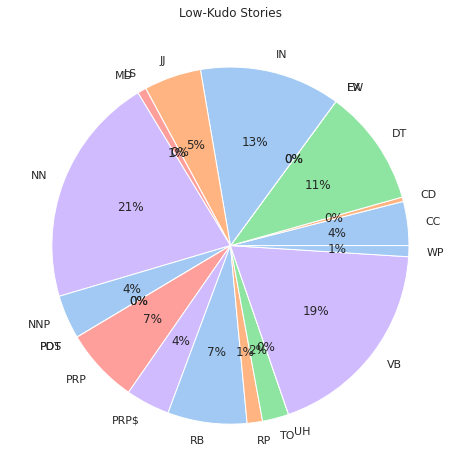

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
# lows.iloc[-1, :-1]

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(8, 10))
plt.pie(lows.iloc[-1, :-1], labels = lows.columns[:-1], colors = colors, autopct = '%0.0f%%')
plt.title('Low-Kudo Stories')

Text(0.5, 1.0, 'High-Kudo Stories')

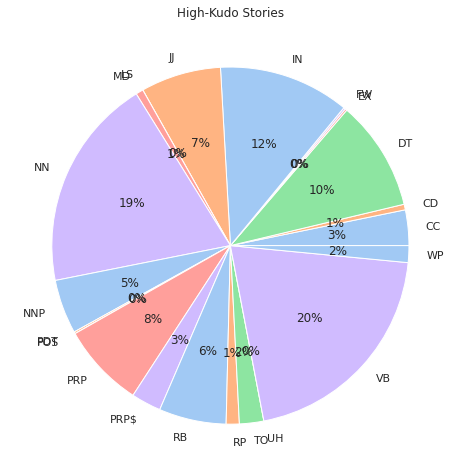

In [175]:
highs.loc['Total'] = highs[lows.columns[:-1]].sum()

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(8, 10))
plt.pie(highs.iloc[-1, :-1], labels = highs.columns[:-1], colors = colors, autopct = '%0.0f%%')
plt.title('High-Kudo Stories')

In [181]:
# total_df = pd.concat([lows.drop(lows.tail(1).index,inplace=True), 
#                       highs.drop(highs.tail(1).index,inplace=True)])
total_df = pd.concat([lows, highs])
total_df

,CC,CD,DT,EX,FW,IN,JJ,LS,MD,NN,...,POS,PRP,PRP$,RB,RP,TO,UH,VB,WP,label
1,1.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,7.0,...,0.0,1.0,4.0,2.0,0.0,1.0,0.0,5.0,0.0,0.0
2,1.0,0.0,2.0,0.0,0.0,3.0,1.0,0.0,1.0,2.0,...,0.0,3.0,1.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0
3,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,3.0,0.0,4.0,0.0,0.0,4.0,3.0,0.0,2.0,6.0,...,0.0,4.0,0.0,3.0,1.0,0.0,0.0,8.0,0.0,1.0
7,2.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,4.0,...,0.0,5.0,1.0,4.0,0.0,0.0,0.0,7.0,1.0,0.0
9,1.0,1.0,2.0,0.0,0.0,4.0,2.0,0.0,0.0,5.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0
10,3.0,0.0,4.0,0.0,0.0,7.0,4.0,0.0,0.0,10.0,...,0.0,5.0,2.0,7.0,2.0,2.0,0.0,11.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0
12,2.0,0.0,3.0,0.0,0.0,4.0,1.0,0.0,1.0,6.0,...,0.0,2.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,1.0
13,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0


#### Plot for total

In [182]:
pos_label_df = total_df[total_df['label'] == 1]

neg_label_df = total_df[total_df['label'] == 0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


Text(0.5, 1.0, 'Postive Label Sentences')

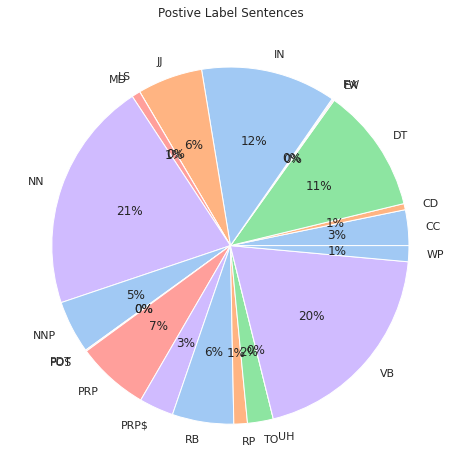

In [183]:
pos_label_df.loc['Total'] = pos_label_df[pos_label_df.columns[:-1]].sum()

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(8, 10))
plt.pie(pos_label_df.iloc[-1, :-1], labels = pos_label_df.columns[:-1], 
        colors = colors, autopct = '%0.0f%%')
plt.title('Postive Label Sentences')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


Text(0.5, 1.0, 'Postive Label Sentences')

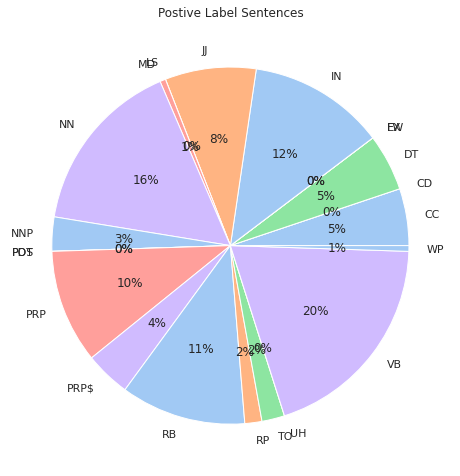

In [185]:
neg_label_df.loc['Total'] = neg_label_df[neg_label_df.columns[:-1]].sum()

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(8, 10))
plt.pie(neg_label_df.iloc[-1, :-1], labels = neg_label_df.columns[:-1], 
        colors = colors, autopct = '%0.0f%%')
plt.title('Postive Label Sentences')

## Sentiment Score

Reference: https://www.analyticsvidhya.com/blog/2021/12/different-methods-for-calculating-sentiment-score-of-text/

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

file = open('/content/negative-words.txt', 'r')
neg_words = file.read().split()
file = open('/content/positive-words.txt', 'r')
pos_words = file.read().split()


def text_prep(x):
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
     return lemmatize


def eval_sent_score(in_path, out_path):
    df = pd.read_csv(in_path)
    title = list(df.columns)[0]  # story title / col name

    lemma = WordNetLemmatizer()
    stop_words = stopwords.words('english')

    preprocess_tag = [text_prep(i) for i in df[title]]
    df["preprocess_txt"] = preprocess_tag

    df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))

    # file = open('/content/negative-words.txt', 'r')
    # neg_words = file.read().split()
    # file = open('/content/positive-words.txt', 'r')
    # pos_words = file.read().split()

    num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
    df['pos_count'] = num_pos
    num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
    df['neg_count'] = num_neg

    df['sentiment'] = round((df['pos_count'] - df['neg_count']) / df['total_len'], 2)

    df.to_csv(out_path)


In [ ]:
import os

DATA_DIR_PATH = "/content/gdrive/MyDrive/course_projects/8980-narrative/data_csv/"
OUT_DIR_PATH = "/content/gdrive/MyDrive/course_projects/8980-narrative/Sentiment_updated/"

# file = open('/content/negative-words.txt', 'r')
# neg_words = file.read().split()
# file = open('/content/positive-words.txt', 'r')
# pos_words = file.read().split()

for root, dir, files in os.walk(DATA_DIR_PATH, topdown=False):
  for name in files:
    in_path = os.path.join(root, name)
    file_name = name.split(".")[0]
    # print(in_path)
    out_path = OUT_DIR_PATH + file_name + "_sent.csv"
    # print(out_path)

    eval_sent_score(in_path, out_path)

    print("done process" + file_name)

done processhero_high
done processhp_low
done processhero_low
done processhp_high


## Attension Visual

In [ ]:
!pip install transformers

  Using cached transformers-4.17.0-py3-none-any.whl (3.8 MB)
  Using cached sacremoses-0.0.49-py3-none-any.whl (895 kB)
  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
  Using cached huggingface_hub-0.4.0-py3-none-any.whl (67 kB)
  Using cached tokenizers-0.11.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (6.5 MB)
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


### sentBERT

In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 79 kB 5.5 MB/s 
     |████████████████████████████████| 3.8 MB 35.2 MB/s 
     |████████████████████████████████| 1.2 MB 51.5 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
     |████████████████████████████████| 596 kB 49.5 MB/s 
     |████████████████████████████████| 6.5 MB 40.4 MB/s 
     |████████████████████████████████| 895 kB 45.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=41835bac7dbd9cfcace942eda9d73d7f6ccd1c1b464f65df3dcff52b26feb537
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['All the world lay in a sleep under the blazing stars.',
    '"Princess Mee, so far as she could tell, was the only thing stirring in all the vast woodland, save only the wind."',
    '"Snow lay on the ground all about, for it had been falling while they marched, and the night was cold."']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    # print("Embedding:", embedding)
    # print("")

Sentence: All the world lay in a sleep under the blazing stars.
Sentence: "Princess Mee, so far as she could tell, was the only thing stirring in all the vast woodland, save only the wind."
Sentence: "Snow lay on the ground all about, for it had been falling while they marched, and the night was cold."


In [ ]:
embeddings[0].shape

(384,)

### various tests - BERT

In [ ]:
from IPython.core.display import display, HTML
display(HTML('<h1>Hello, world!</h1>'))

In [ ]:
import torch
from torch.utils.data import TensorDataset
from transformers import BertModel, BertConfig, BertTokenizer
from transformers import BertTokenizer, BertForPreTraining

# tokenizer = BertTokenizer.from_pretrained(
#     'bert-base-uncased',
#     do_lower_case=True
# )
# configuration = BertConfig()
# model = BertModel(configuration)
# configuration = model.config

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)
model = BertForPreTraining.from_pretrained("bert-base-uncased")
model.eval()

Some weights of BertForPreTraining were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['cls.predictions.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForPreTraining(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine

In [ ]:
with torch.no_grad():
  inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
  outputs = model(**inputs, output_hidden_states=True, output_attentions=True)

  prediction_logits = outputs.prediction_logits
  seq_relationship_logits = outputs.seq_relationship_logits
  hidden_states = outputs.hidden_states
  attentions = outputs.attentions   # Attentions weights after the attention softmax, used to compute the weighted average in the self-attention heads.

  # hidden_states = outputs[2]

In [ ]:
prediction_logits[0].shape

torch.Size([9, 30522])

In [ ]:
attentions[0][0][-1].shape

torch.Size([8, 8])

In [ ]:
temp = attentions[0][0][-1][0]    # self_attention of [CLS] token to other words
temp2 = temp.cpu().detach().numpy()

In [ ]:
temp3 = temp2[1:-1]

In [ ]:
sum = np.sum(temp3)
np2 = temp3 / sum

In [ ]:
np.sum(np2)

0.9999999

In [ ]:
np2  # atten array

array([1.6545860e-01, 5.9394577e-05, 5.0289553e-01, 4.6565197e-02,
       8.9565061e-02, 1.9545615e-01], dtype=float32)

In [ ]:
text = "Hello, my dog is cute"

In [ ]:
for word in tokenizer.tokenize(text):
  print(word)

hello
,
my
dog
is
cute


In [ ]:
marked_txt = mk_html(tokenizer.tokenize(text), np2)

In [ ]:
from IPython.core.display import display, HTML

display(HTML(marked_txt))

In [ ]:
text = "\"Princess Mee, so far as she could tell, was the only thing stirring in all the vast woodland, save only the wind.\""

with torch.no_grad():
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs, output_hidden_states=True, output_attentions=True)

    hidden_states = outputs.hidden_states
    # Attentions weights after the attention softmax, used to compute the weighted average in the self-attention heads.
    attentions = outputs.attentions

CLS_attention = attentions[0][0][-1][0]    # self_attention of [CLS] token to other words

In [ ]:
CLS_attention.shape

torch.Size([31])

In [ ]:
len(tokenizer.tokenize(text))

29

### Implementation:

In [ ]:
import torch
from torch.utils.data import TensorDataset
from transformers import BertTokenizer, BertForPreTraining

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)
model = BertForPreTraining.from_pretrained("bert-base-uncased")
model.eval()

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of BertForPreTraining were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['cls.predictions.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForPreTraining(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine

In [ ]:
import numpy as np
import os
from IPython.display import HTML, display

def highlight(word, attn):
    html_color = '#%02X%02X%02X' % (255, int(255*(1 - attn)), int(255*(1 - attn)))
    return '<span style="background-color: {}">{}</span>'.format(html_color, word)

def mk_html(seq, attns):
    html = ""
    for token, attn in zip(seq, attns):
        html += ' ' + highlight(
            token,
            attn
        )
    return html + "<br><br>\n"

def visualize_self_attns(text):
  with torch.no_grad():
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs, output_hidden_states=True, output_attentions=True)

    hidden_states = outputs.hidden_states
    # Attentions weights after the attention softmax, used to compute the weighted average in the self-attention heads.
    attentions = outputs.attentions

  CLS_attention = attentions[0][0][-1][0]    # self_attention of [CLS] token to other words
  sent_atten = CLS_attention.numpy()[1:-1]

  sum = np.sum(sent_atten)
  attns = sent_atten / sum

  marked_txt = mk_html(tokenizer.tokenize(text), attns)
  display(HTML(marked_txt))

In [ ]:
visualize_self_attns("All the world lay in a sleep under the blazing stars.")

In [ ]:
visualize_self_attns("\"Princess Mee, so far as she could tell, was the only thing stirring in all the vast woodland, save only the wind.\"")

In [ ]:
visualize_self_attns("\"She gathered her warm cloak, woven from the webs of gossamer moths, and silent as a shadow, crept from the tent where her folk lay asleep, weary from long days of marching.\"")

In [ ]:
visualize_self_attns("She could weave marvelous garments from the webs of gossamer moths; all her folk wore them.")